In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
import numpy as np
from src.features import *
from src.utils import *
import networkx as nx
from sklearn.neighbors import KernelDensity

In [2]:
stocks = ["SPY", "VTV", "VUG", "VYM", "QQQ", "VNQ", "GLD", "AGG", "SOXX", "OIH", "IYT", "XLF", "XLV", "VOX", "XLY", "XLP", "BND", "BSV", "IEMG", "VEA", "VWO"]
stocks = sorted(stocks)

stock_classes = {'AGG': 'EQUITY', 'GLD': 'COMMODITY', 'IYT': 'EQUITY', 'OIH': 'EQUITY', 'QQQ': 'EQUITY',
                 'SOXX': 'EQUITY', 'SPY': 'EQUITY', 'VNQ': 'REAL_ESTATE', 'VOX': 'EQUITY', 'VTV': 'EQUITY',
                 'VUG': 'EQUITY', 'VYM': 'EQUITY', 'XLF': 'EQUITY', 'XLP': 'EQUITY', 'XLV': 'EQUITY', 'XLY': 'EQUITY',
                 "BND": "FIXED_INCOME", "BSV": "FIXED_INCOME", "IEMG": "EQUITY", "VEA": "EQUITY", "VWO": "EQUITY"
}

classes_color = {'EQUITY': 'salmon', 'COMMODITY': 'cyan', 'FIXED_INCOME': 'lightgreen', "REAL_ESTATE": "lightblue"}

len(stocks)

21

In [5]:
path = "C:\\Users\\Андрей\\Documents\\diploma_python\\data"

df_adj_close, df_close, df_high, df_low, df_volume = get_data(path, stocks)

AGG Start of history: 2003-09-29
BND Start of history: 2007-04-10
BSV Start of history: 2007-04-10
GLD Start of history: 2004-11-18
IEMG Start of history: 2012-10-24
IYT Start of history: 2004-01-02
OIH Start of history: 2001-02-26
QQQ Start of history: 1999-03-10
SOXX Start of history: 2001-07-13
SPY Start of history: 1993-01-29
VEA Start of history: 2007-07-26
VNQ Start of history: 2004-09-29
VOX Start of history: 2004-09-29
VTV Start of history: 2004-01-30
VUG Start of history: 2004-01-30
VWO Start of history: 2005-03-10
VYM Start of history: 2006-11-16
XLF Start of history: 1998-12-22
XLP Start of history: 1998-12-22
XLV Start of history: 1998-12-22
XLY Start of history: 1998-12-22


In [32]:
df_return_1 = df_adj_close.pct_change(1).dropna()
df_return_3 = df_adj_close.pct_change(3).dropna()
df_return_5 = df_adj_close.pct_change(5).dropna()
df_return_7 = df_adj_close.pct_change(7).dropna()
df_return_10 = df_adj_close.pct_change(10).dropna()
df_return_14 = df_adj_close.pct_change(14).dropna()

df_return_1.columns=stocks
df_return_3.columns=stocks
df_return_5.columns=stocks
df_return_7.columns=stocks
df_return_10.columns=stocks
df_return_14.columns=stocks

21it [00:26,  1.26s/it]


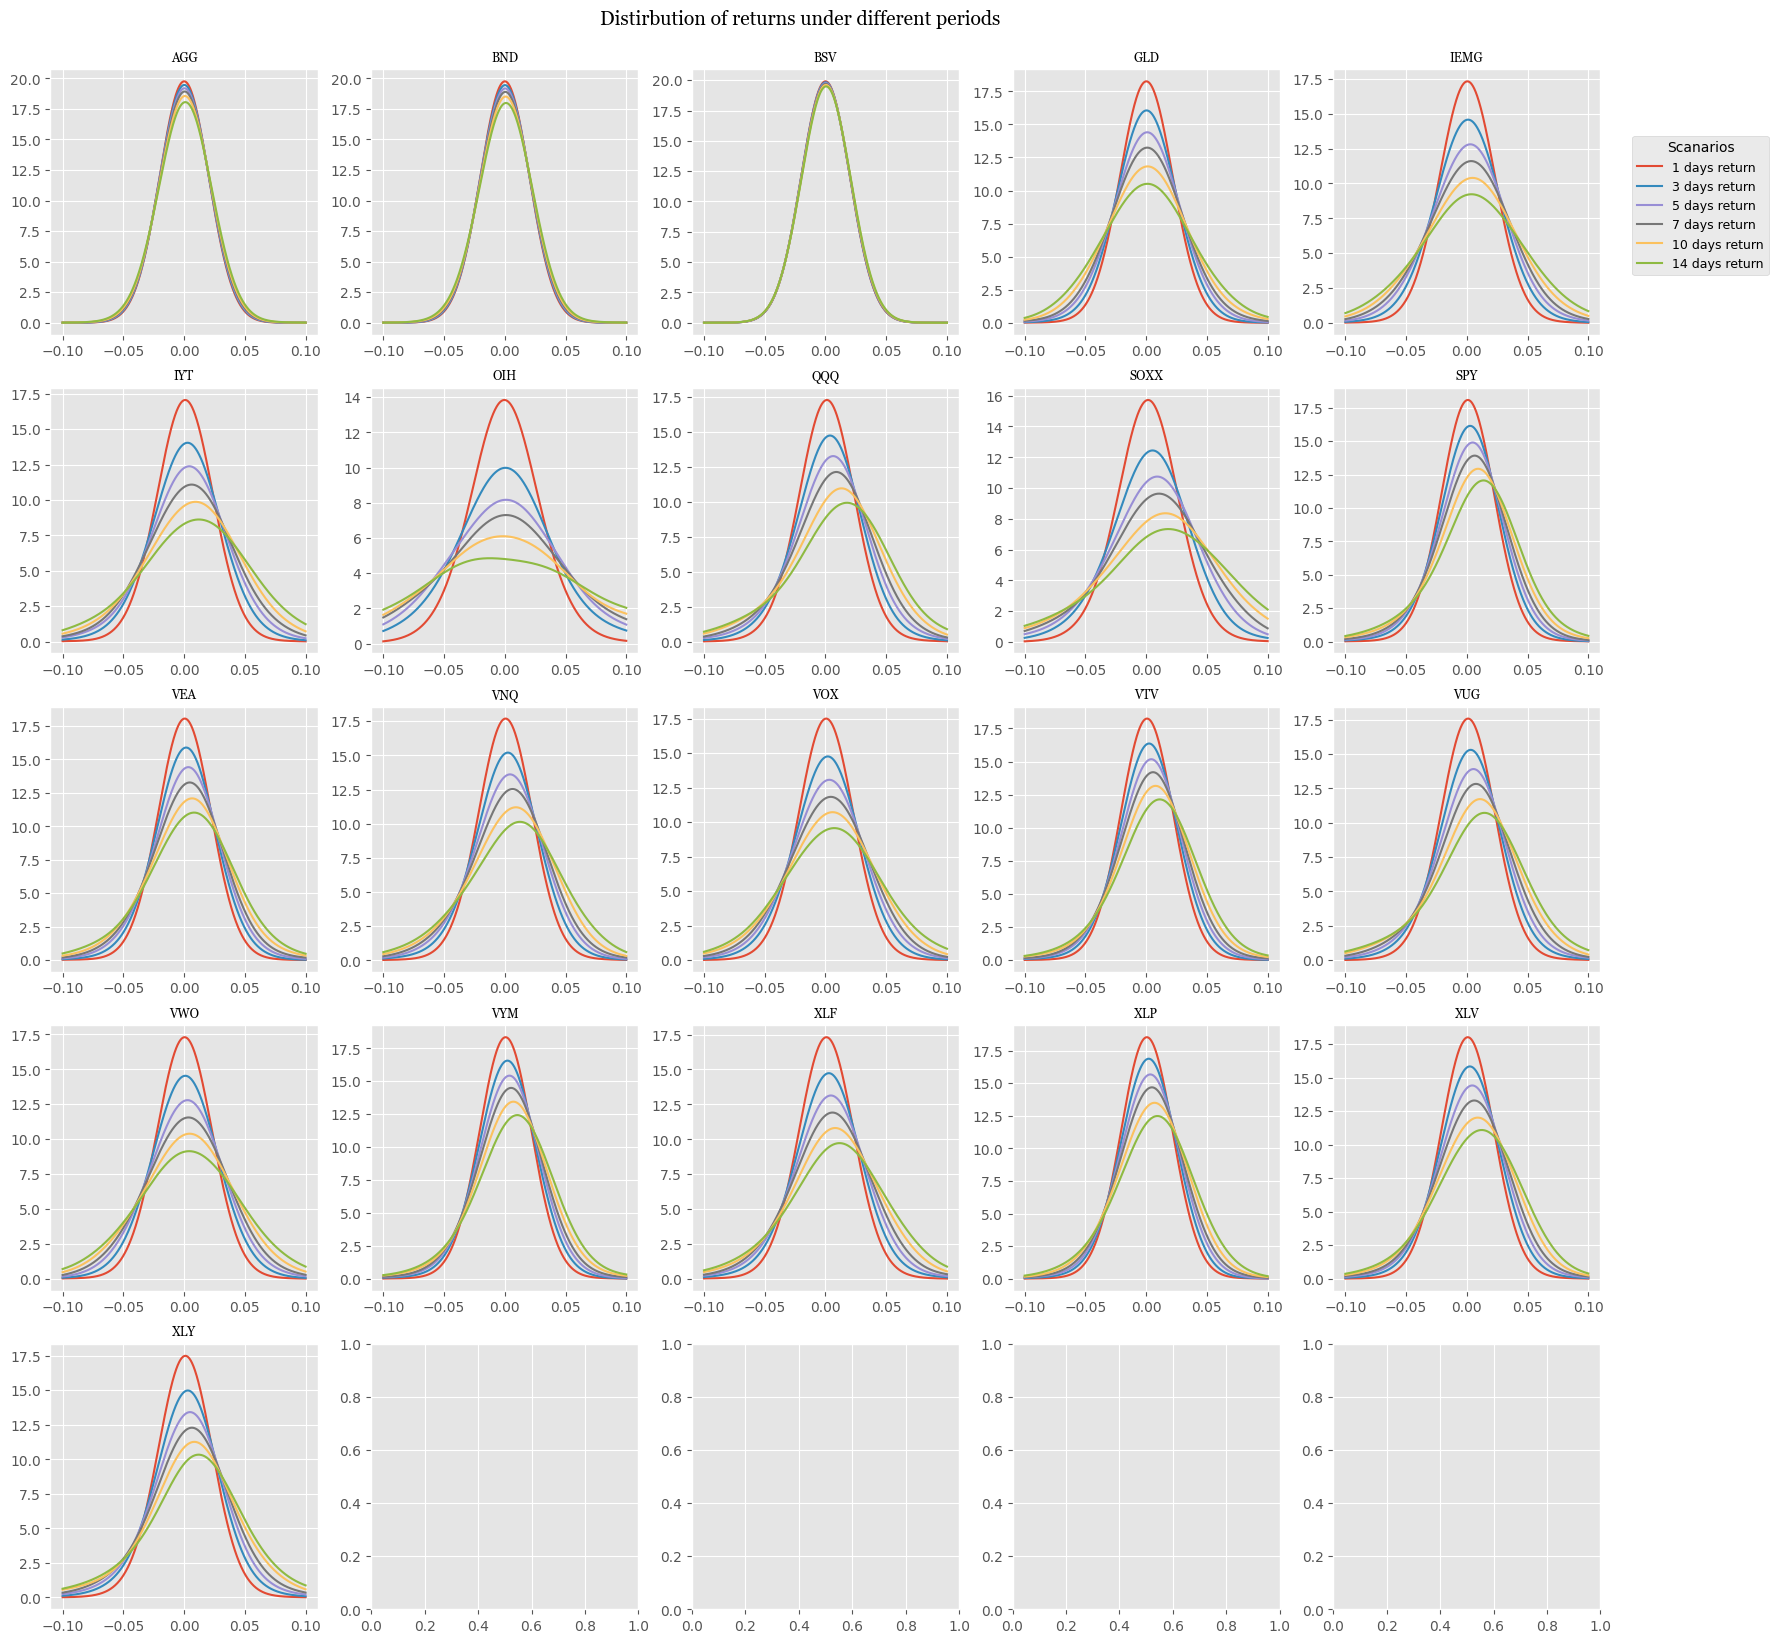

In [33]:
plt.style.use('ggplot')

fig, ax = plt.subplots(5, 5, figsize=(20, 20))


for i, stock in tqdm(enumerate(stocks)):

    for df, j in zip([df_return_1, df_return_3, df_return_5, df_return_7, df_return_10, df_return_14], [1, 3, 5, 7, 10, 14]):

        kde = KernelDensity(kernel='gaussian', bandwidth=0.02)
        kde.fit(df.to_numpy()[:, i].reshape(-1,1))

        x = np.linspace(-0.1, 0.1, 1000)
        logprob = kde.score_samples(x.reshape(-1,1))

        ax[i//5, i%5].plot(x, np.exp(logprob), label=f'{j} days return')

    ax[i//5, i%5].set_title(stock, fontsize=9, fontname='Georgia')

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.95, 0.85), title='Scanarios', fontsize=9)
fig.suptitle('Distirbution of returns under different periods', fontsize=14, fontname='Georgia', y=0.91)

plt.show()